In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import colors
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
class Complex_Coupling():
    
    def __init__(self, w1, w2, phi, dt = 0.01, iter = 2000):
        
        '''
        -------------------------------------------------
        Args:
            w1:     Angular frequency of oscillator 1
            w2:     Angular frequency of oscillator 2
            phi:    Coupling phase offset
        --------------------------------------------------
        '''
        
        self.w1 = w1            # Initalizing w1
        self.w2 = w2            # Initalizing w2
        self.phi = phi          # Initalizing phi
        
        self.dt = dt       
        self.iter = iter
    #==========================================================================================   
    def model(self, r1_initial, r2_initial, theta_1_initial, theta_2_initial, A, mu = 1):
        
        '''
        -------------------------------------------------
        Args:
            rn_initial:     Inital amplitude of oscillator n
            tn_initial:     Initial theta of oscillator n
            A:              Coupling strength (low values for our case)
            mu:             Parameter in the differential equation for the Hopf Oscillator
        --------------------------------------------------
        '''
        
        self.r1_monitor = []      # For monitioring the values of r1
        self.r2_monitor = []      # For monitioring the values of r2
        self.t1_monitor = []      # For monitioring the values of theta 1
        self.t2_monitor = []      # For monitioring the values of theta 2
        self.time = []            # For monitioring time
        
        # Setting up initial values
        self.r1_monitor.append(r1_initial)  
        self.r2_monitor.append(r2_initial)    
        self.t1_monitor.append(theta_1_initial)      
        self.t2_monitor.append(theta_2_initial)
        self.time.append(0)
        
        # Setting up the variables for solving the differential equation numerically
        r1 = r1_initial
        r2 = r2_initial
        t1 = theta_1_initial
        t2 = theta_2_initial
        
        w1 = self.w1
        w2 = self.w2
        phi = self.phi
        
        dt = self.dt
        iter = self.iter

        for n in range(1,iter):
            
            # Determining the small increments
            dr1 = (((mu-r1**2)*r1) + (A*r2*np.cos(t2 - t1 + phi)))*dt
            
            dr2 = (((mu-r2**2)*r2) + (A*r1*np.cos(t1 - t2 - phi)))*dt
            
            dt1 = (w1 + (A*(r2/r1)*np.sin(t2 - t1 + phi)))*dt
            
            dt2 = (w2 + (A*(r1/r2)*np.sin(t1 - t2 - phi)))*dt
            
            # Updating the variables
            r1 = r1+dr1
            r2 = r2+dr2
            t1 = t1+dt1
            t2 = t2+dt2
            
            # Appending the values to the monitors
            self.r1_monitor.append(r1)  
            self.r2_monitor.append(r2)    
            self.t1_monitor.append(t1)      
            self.t2_monitor.append(t2)
            self.time.append(n*dt)
            
    #==========================================================================================
    # Plotting the Real Part of Z
    def osc_behaviour_plot(self):
        
        y1 = []
        y2 = []
        for n in range(len(self.time)):
            
            y1.append(self.r1_monitor[n]*np.cos(self.t1_monitor[n]))
            y2.append(self.r2_monitor[n]*np.cos(self.t2_monitor[n]))

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, y1, color='#FFF300', linewidth=1.5, label='Osc 1(t)')
        plt.plot(self.time, y2, color='#FF073A', linewidth=1.5, label='Osc 2(t)')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel('Real (z)', color='white', fontsize=12)
        plt.title('Oscillator behaviour over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 20)
        #ax.set_ylim(-1.5, 1.5)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        ax.legend(
        facecolor='black',
        edgecolor='white',
        labelcolor='white',
        fontsize=10,
        loc='center',          # anchor legend’s left edge
        bbox_to_anchor=(1.065, 0.5)  # place just outside the right boundary
        )
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting Z in the Argand Plane
    def argand_plot(self):
    
        x1, y1, x2, y2 = [], [], [], []

        for n in range(len(self.time)):
            x1.append(self.r1_monitor[n] * np.cos(self.t1_monitor[n]))
            y1.append(self.r1_monitor[n] * np.sin(self.t1_monitor[n]))
            x2.append(self.r2_monitor[n] * np.cos(self.t2_monitor[n]))
            y2.append(self.r2_monitor[n] * np.sin(self.t2_monitor[n]))

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Magnitude and direction calculation ----------
        dx1, dy1 = x1[2] - x1[0], y1[2] - y1[0]
        mag1 = (dx1**2 + dy1**2) ** 0.5

        dx2, dy2 = x2[2] - x2[0], y2[2] - y2[0]
        mag2 = (dx2**2 + dy2**2) ** 0.5

        shaft_len = 0.04

        # ---------- Start arrows ----------
        if mag1 != 0:
            end_x1 = x1[0] + shaft_len * dx1 / mag1
            end_y1 = y1[0] + shaft_len * dy1 / mag1

            ax.annotate(
                '', xy=(end_x1, end_y1), xytext=(x1[0], y1[0]),
                arrowprops=dict(
                    arrowstyle='-|>,head_width=0.1,head_length=0.3',
                    lw=1.5, color='#FFF300',
                    mutation_scale=18
                ),
                zorder=5
            )

        if mag2 != 0:
            end_x2 = x2[0] + shaft_len * dx2 / mag2
            end_y2 = y2[0] + shaft_len * dy2 / mag2

            ax.annotate(
                '', xy=(end_x2, end_y2), xytext=(x2[0], y2[0]),
                arrowprops=dict(
                    arrowstyle='-|>,head_width=0.08,head_length=0.3',
                    lw=1.5, color='#FF073A',
                    mutation_scale=18
                ),
                zorder=5
            )

        # ---------- Plot trajectories ----------
        ax.plot(x1, y1, color='#FFF300', linewidth=0.75, label='...', zorder=1)
        ax.plot(x2, y2, color='#FF073A', linewidth=0.75, label='...', zorder=1)

        # ---------- End dots ----------
        ax.scatter(x1[-1], y1[-1], s=28, facecolor='#FFF300', edgecolor='none', zorder=4)
        ax.scatter(x2[-1], y2[-1], s=28, facecolor='#FF073A', edgecolor='none', zorder=4)

        # ---------- Axes cosmetics ----------
        ax.set_xlabel('Real (z)', color='white', fontsize=12)
        ax.set_ylabel('Imaginary (z)', color='white', fontsize=12)
        ax.set_title('Limit Cycles', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        ax.grid(True, color='gray', alpha=0.3, linestyle='--')

        # ---------- Custom Legend ----------
        line_handle_1 = mlines.Line2D([], [], color='#FFF300', linewidth=1.5, label='Osc 1 trajectory')
        line_handle_2 = mlines.Line2D([], [], color='#FF073A', linewidth=1.5, label='Osc 2 trajectory')

        dot_handle_1 = mlines.Line2D([], [], color='none', marker='o',
                                   markerfacecolor='#FFF300', markersize=5,
                                   label='end (point)')
        dot_handle_2 = mlines.Line2D([], [], color='none', marker='o',
                                   markerfacecolor='#FF073A', markersize=5,
                                   label='end (point)')

        ax.legend(handles=[line_handle_1, line_handle_2, dot_handle_1, dot_handle_2],
                  facecolor='black', edgecolor='white', labelcolor='white',
                  loc='center left', bbox_to_anchor=(1.02, 0.5),
                  borderaxespad=0, fontsize=12)

        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting r vs Time
    def RT_plot(self):

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, self.r1_monitor, color='#FFF300', linewidth=1.5, label='Osc 1(t)')
        plt.plot(self.time, self.r2_monitor, color='#FF073A', linewidth=1.5, label='Osc 2(t)')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel('r', color='white', fontsize=12)
        plt.title('r vs Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 20)
        ax.set_ylim(0,1.5)
        
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        ax.legend(
        facecolor='black',
        edgecolor='white',
        labelcolor='white',
        fontsize=10,
        loc='center',          # anchor legend’s left edge
        bbox_to_anchor=(1.065, 0.5)  # place just outside the right boundary
        )
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting the Phase difference psi
    def phase_difference(self):
        
        pd = []
        target =[]
        for n in range(len(self.time)):
            
            off = (self.t1_monitor[n]-self.t2_monitor[n])
            pd.append(off)
            target.append(self.phi)

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, pd, color='#1F51FF', linewidth=1.5, label=r'Phase difference ($\psi$)')
        plt.plot(self.time, target, color='white', linewidth=1.5, label=r' $\phi$')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel(r'Phase difference (in Radians) [$\theta_1(t) - \theta_2(t)$]', color='white', fontsize=12)
        plt.title('Phase difference ($\psi$) over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 20)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting psi-phi
    def convergence(self):
        
        conv = []
        for n in range(len(self.time)):
            
            off = (self.t1_monitor[n]-self.t2_monitor[n]-self.phi)
            conv.append(off)

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, conv, color='#1F51FF', linewidth=1.5, label=r'$\theta_1(t) - \theta_2(t)-\phi$')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel(r'$\theta_1(t) - \theta_2(t)-\phi$ (in Radians)', color='white', fontsize=12)
        plt.title('$\psi-\phi$ over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 20)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================

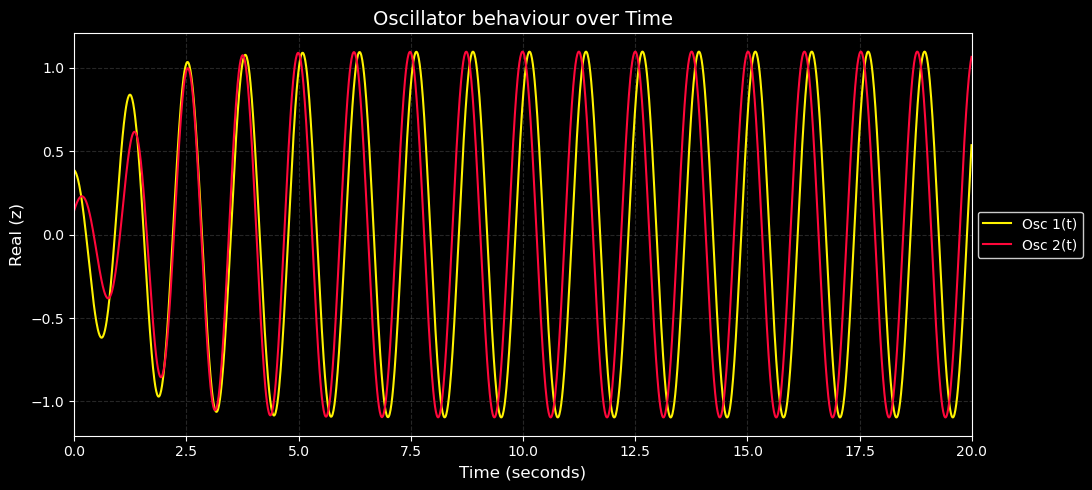

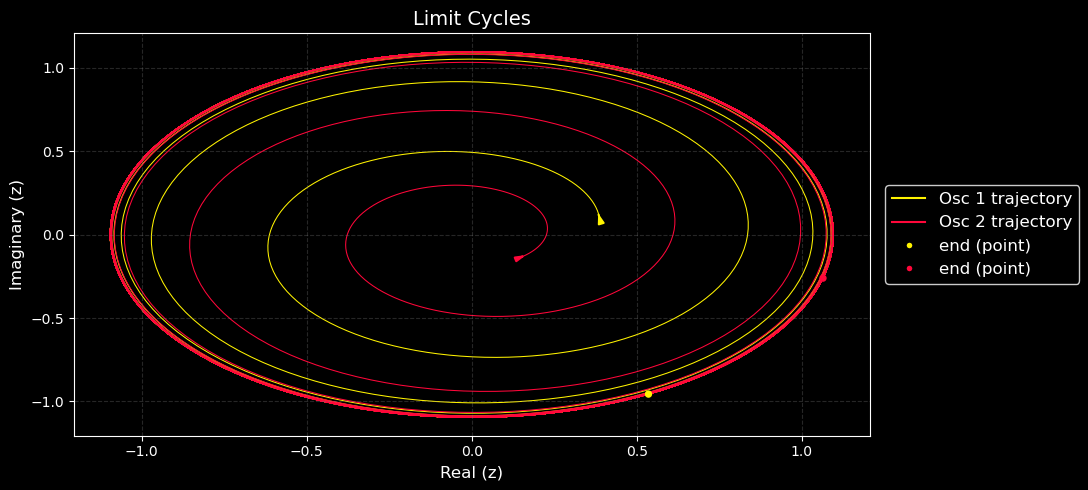

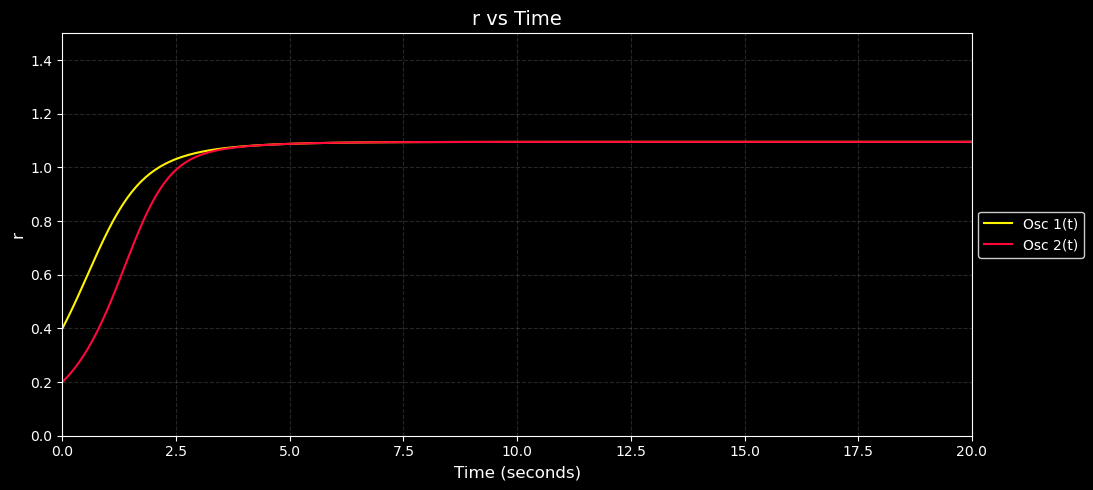

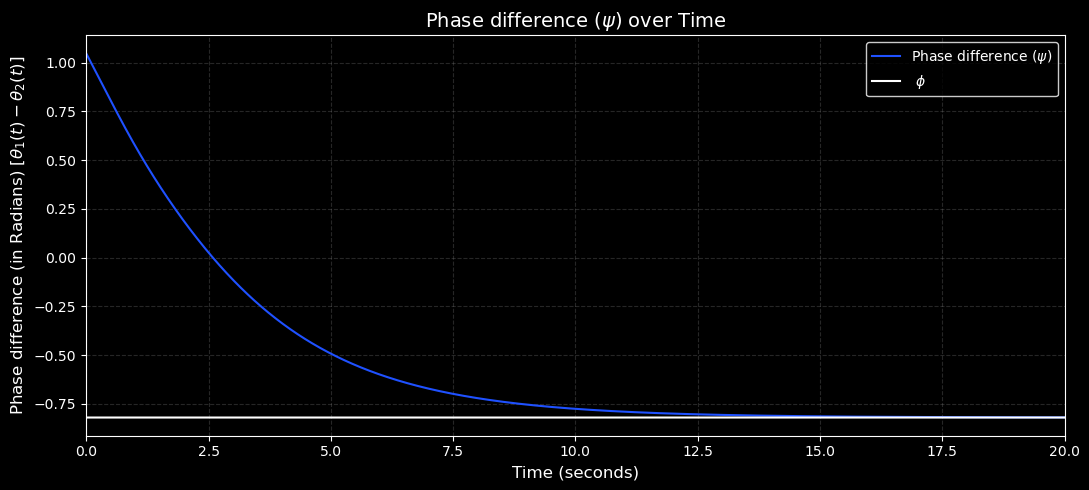

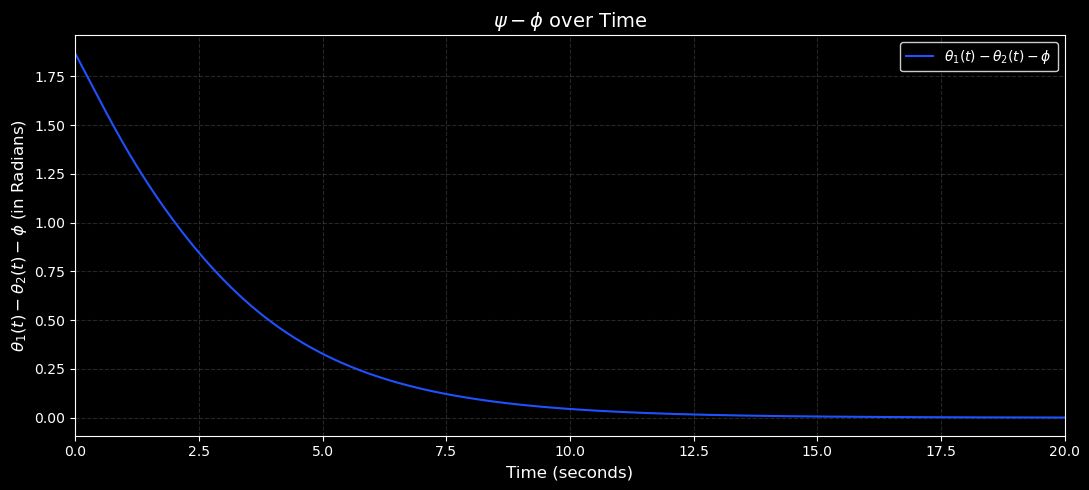

In [3]:
w1,w2 = 5,5
phi = (-47)*(math.pi/180)

CC = Complex_Coupling(w1,w2,phi)

r1 = 0.4
r2 = 0.2
theta_1 = 15*(math.pi/180)
theta_2 = -45*(math.pi/180)
A = 0.2

CC.model(r1, r2, theta_1, theta_2, A)
CC.osc_behaviour_plot()
CC.argand_plot()
CC.RT_plot()
CC.phase_difference()
CC.convergence()

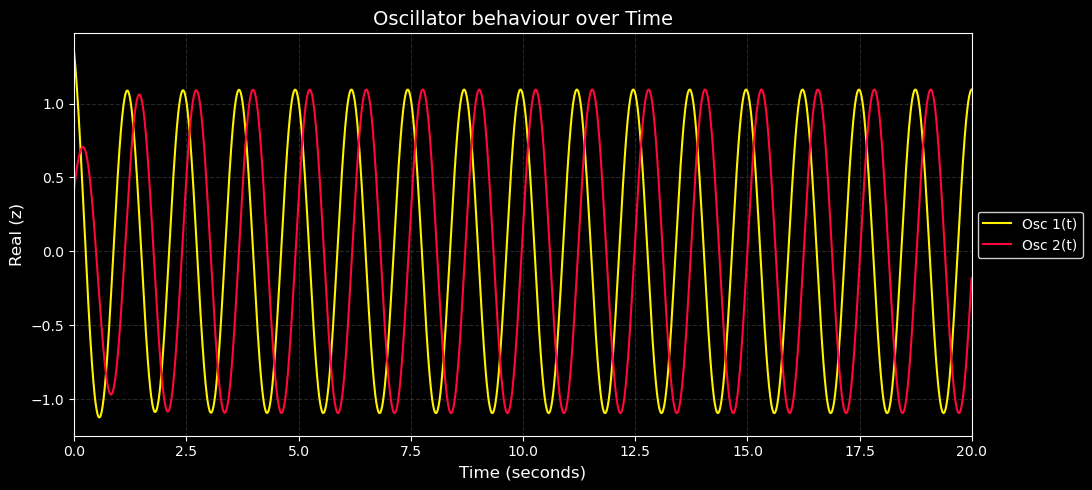

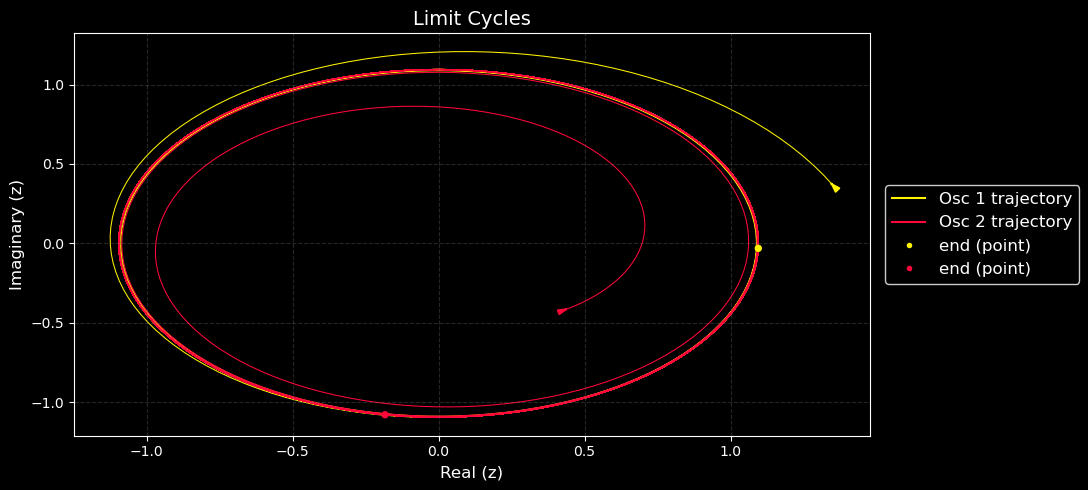

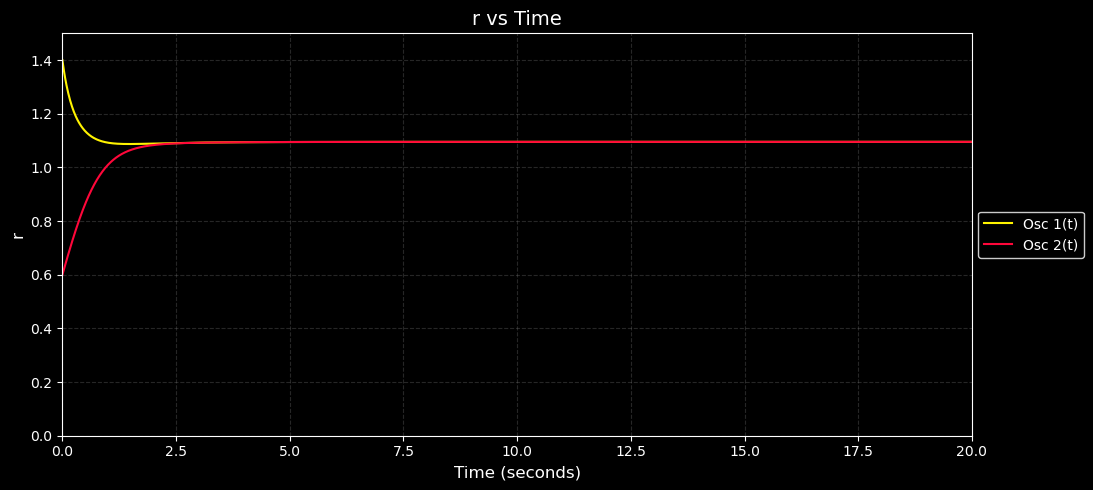

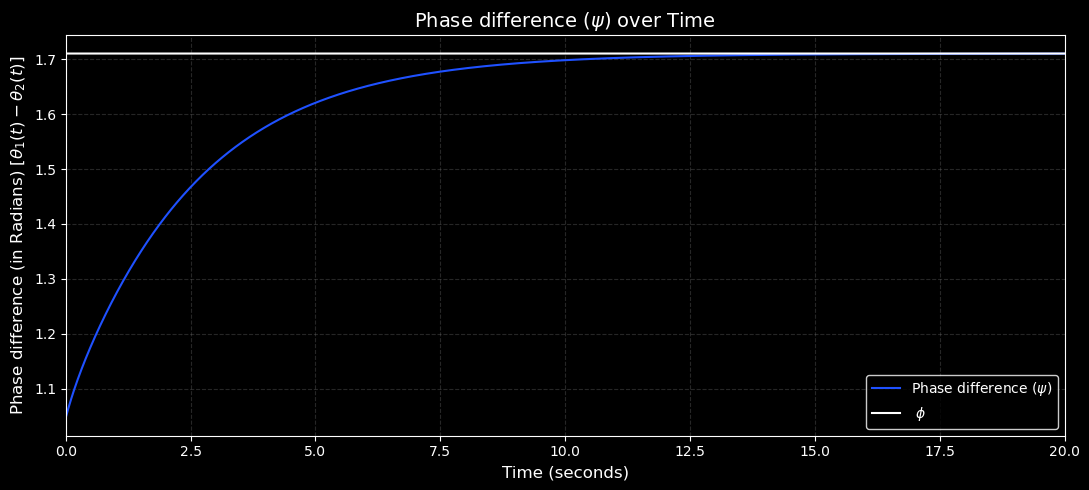

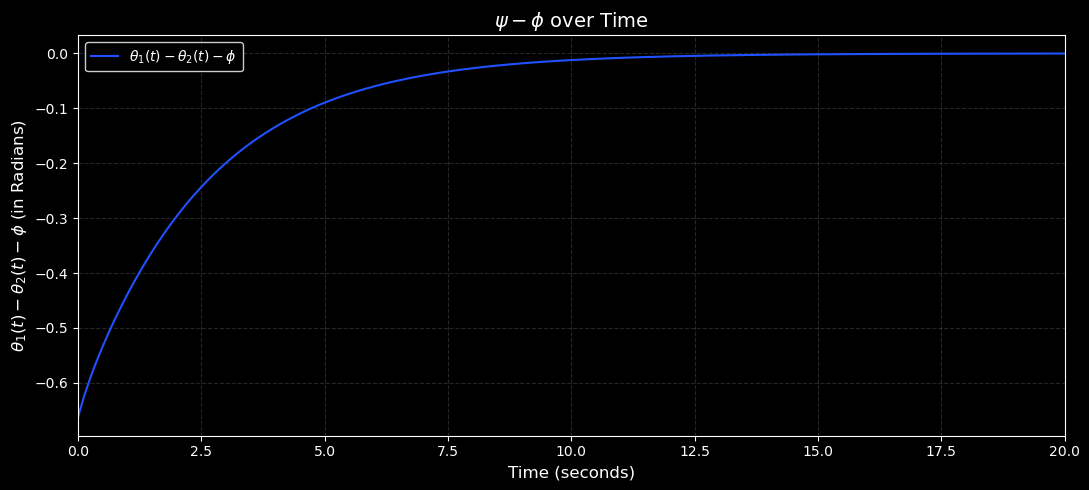

In [4]:
w1,w2 = 5,5
phi = (98)*(math.pi/180)

CC = Complex_Coupling(w1,w2,phi)

r1 = 1.4
r2 = 0.6
theta_1 = 15*(math.pi/180)
theta_2 = -45*(math.pi/180)
A = 0.2

CC.model(r1, r2, theta_1, theta_2, A)
CC.osc_behaviour_plot()
CC.argand_plot()
CC.RT_plot()
CC.phase_difference()
CC.convergence()

In [5]:
class Power_Coupling():
    
    def __init__(self, w1, w2, phi, dt = 0.01, iter = 5000):
        
        '''
        -------------------------------------------------
        Args:
            w1:     Angular frequency of oscillator 1
            w2:     Angular frequency of oscillator 2
            phi:    Coupling phase offset
        --------------------------------------------------
        '''
        
        self.w1 = w1            # Initalizing w1
        self.w2 = w2            # Initalizing w2
        self.phi = phi          # Initalizing phi
        
        self.dt = dt       
        self.iter = iter
    #==========================================================================================   
    def model(self, r1_initial, r2_initial, theta_1_initial, theta_2_initial, A, mu = 1):
        
        '''
        -------------------------------------------------
        Args:
            rn_initial:     Inital amplitude of oscillator n
            tn_initial:     Initial theta of oscillator n
            A:              Coupling strength (low values for our case)
            mu:             Parameter in the differential equation for the Hopf Oscillator
        --------------------------------------------------
        '''
        
        self.r1_monitor = []      # For monitioring the values of r1
        self.r2_monitor = []      # For monitioring the values of r2
        self.t1_monitor = []      # For monitioring the values of theta 1
        self.t2_monitor = []      # For monitioring the values of theta 2
        self.psi_monitor = []     # For monitoring the values of normalized phase difference
        self.dpsi_dt_monitor = [] # For monitoring the time derivative of psi
        self.sigma_monitor = []           # For monitoring sigma
        self.time = []            # For monitioring time
        
        # Setting up initial values
        self.r1_monitor.append(r1_initial)  
        self.r2_monitor.append(r2_initial)    
        self.t1_monitor.append(theta_1_initial)      
        self.t2_monitor.append(theta_2_initial)
        self.time.append(0)
        
        # Setting up the variables for solving the differential equation numerically
        r1 = r1_initial
        r2 = r2_initial
        t1 = theta_1_initial
        t2 = theta_2_initial
        
        w1 = self.w1
        w2 = self.w2
        phi = self.phi
        
        psi = (t1/w1)-(t2/w2)
        self.psi_monitor.append(psi)
        
        sigma = psi - (phi/(w1*w2))
        self.sigma_monitor.append(sigma)
        
        dpsi_dt = A * (
        ((r2 * (w1 / w2)) / (w1 * r1)) * np.sin(w1 * (phi / (w1 * w2) - psi)) +
        ((r1 * (w2 / w1)) / (w2 * r2)) * np.sin(w2 * (phi / (w1 * w2) - psi))
        )
        self.dpsi_dt_monitor.append(dpsi_dt)
        
        
        
        dt = self.dt
        iter = self.iter

        for n in range(1,iter):
            
            # Determining the small increments
            dr1 = (((mu-r1**2)*r1) + (A*(r2**(w1/w2))*np.cos(w1*((t2/w2)-(t1/w1)+(phi/(w1*w2))))))*dt
            
            dr2 = (((mu-r2**2)*r2) + (A*(r1**(w2/w1))*np.cos(w2*((t1/w1)-(t2/w2)-(phi/(w1*w2))))))*dt
            
            dt1 = (w1 + (A*((r2**(w1/w2))/r1)*np.sin(w1*((t2/w2)-(t1/w1)+(phi/(w1*w2))))))*dt
            
            dt2 = (w2 + (A*((r1**(w2/w1))/r2)*np.sin(w2*((t1/w1)-(t2/w2)-(phi/(w1*w2))))))*dt
            
            # Updating the variables
            r1 = r1+dr1
            r2 = r2+dr2
            t1 = t1+dt1
            t2 = t2+dt2
            
            psi = (t1/w1)-(t2/w2)
            sigma = psi - (phi/(w1*w2))
            dpsi_dt = A * (
            ((r2 * (w1 / w2)) / (w1 * r1)) * np.sin(w1 * (phi / (w1 * w2) - psi)) +
            ((r1 * (w2 / w1)) / (w2 * r2)) * np.sin(w2 * (phi / (w1 * w2) - psi))
            )
                      
            # Appending the values to the monitors
            self.r1_monitor.append(r1)  
            self.r2_monitor.append(r2)    
            self.t1_monitor.append(t1)      
            self.t2_monitor.append(t2)
            
            self.psi_monitor.append(psi)
            self.sigma_monitor.append(sigma)
            self.dpsi_dt_monitor.append(dpsi_dt)
            
            self.time.append(n*dt)
            
            
    #==========================================================================================
    # Plotting the Real Part of Z
    def osc_behaviour_plot(self):
        
        y1 = []
        y2 = []
        for n in range(len(self.time)):
            
            y1.append(self.r1_monitor[n]*np.cos(self.t1_monitor[n]))
            y2.append(self.r2_monitor[n]*np.cos(self.t2_monitor[n]))

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, y1, color='#FFF300', linewidth=1.5, label='Osc 1(t)')
        plt.plot(self.time, y2, color='#FF073A', linewidth=1.5, label='Osc 2(t)')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel('Real (z)', color='white', fontsize=12)
        plt.title('Oscillator behaviour over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 50)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        ax.legend(
        facecolor='black',
        edgecolor='white',
        labelcolor='white',
        fontsize=10,
        loc='center',          # anchor legend’s left edge
        bbox_to_anchor=(1.065, 0.5)  # place just outside the right boundary
        )
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting Z in the Argand Plane
    def argand_plot(self):
    
        x1, y1, x2, y2 = [], [], [], []

        for n in range(len(self.time)):
            x1.append(self.r1_monitor[n] * np.cos(self.t1_monitor[n]))
            y1.append(self.r1_monitor[n] * np.sin(self.t1_monitor[n]))
            x2.append(self.r2_monitor[n] * np.cos(self.t2_monitor[n]))
            y2.append(self.r2_monitor[n] * np.sin(self.t2_monitor[n]))

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Magnitude and direction calculation ----------
        dx1, dy1 = x1[2] - x1[0], y1[2] - y1[0]
        mag1 = (dx1**2 + dy1**2) ** 0.5

        dx2, dy2 = x2[2] - x2[0], y2[2] - y2[0]
        mag2 = (dx2**2 + dy2**2) ** 0.5

        shaft_len = 0.04

        # ---------- Start arrows ----------
        if mag1 != 0:
            end_x1 = x1[0] + shaft_len * dx1 / mag1
            end_y1 = y1[0] + shaft_len * dy1 / mag1

            ax.annotate(
                '', xy=(end_x1, end_y1), xytext=(x1[0], y1[0]),
                arrowprops=dict(
                    arrowstyle='-|>,head_width=0.1,head_length=0.3',
                    lw=1.5, color='#FFF300',
                    mutation_scale=18
                ),
                zorder=5
            )

        if mag2 != 0:
            end_x2 = x2[0] + shaft_len * dx2 / mag2
            end_y2 = y2[0] + shaft_len * dy2 / mag2

            ax.annotate(
                '', xy=(end_x2, end_y2), xytext=(x2[0], y2[0]),
                arrowprops=dict(
                    arrowstyle='-|>,head_width=0.08,head_length=0.3',
                    lw=1.5, color='#FF073A',
                    mutation_scale=18
                ),
                zorder=5
            )

        # ---------- Plot trajectories ----------
        ax.plot(x1, y1, color='#FFF300', linewidth=0.5, label='...', zorder=1)
        ax.plot(x2, y2, color='#FF073A', linewidth=0.5, label='...', zorder=1)

        # ---------- End dots ----------
        ax.scatter(x1[-1], y1[-1], s=28, facecolor='#FFF300', edgecolor='none', zorder=4)
        ax.scatter(x2[-1], y2[-1], s=28, facecolor='#FF073A', edgecolor='none', zorder=4)

        # ---------- Axes cosmetics ----------
        ax.set_xlabel('Real (z)', color='white', fontsize=12)
        ax.set_ylabel('Imaginary (z)', color='white', fontsize=12)
        ax.set_title('Limit Cycles', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        ax.grid(True, color='gray', alpha=0.3, linestyle='--')

        # ---------- Custom Legend ----------
        line_handle_1 = mlines.Line2D([], [], color='#FFF300', linewidth=1.5, label='Osc 1 trajectory')
        line_handle_2 = mlines.Line2D([], [], color='#FF073A', linewidth=1.5, label='Osc 2 trajectory')

        dot_handle_1 = mlines.Line2D([], [], color='none', marker='o',
                                   markerfacecolor='#FFF300', markersize=5,
                                   label='end (point)')
        dot_handle_2 = mlines.Line2D([], [], color='none', marker='o',
                                   markerfacecolor='#FF073A', markersize=5,
                                   label='end (point)')

        ax.legend(handles=[line_handle_1, line_handle_2, dot_handle_1, dot_handle_2],
                  facecolor='black', edgecolor='white', labelcolor='white',
                  loc='center left', bbox_to_anchor=(1.02, 0.5),
                  borderaxespad=0, fontsize=12)

        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting r vs Time
    def RT_plot(self):

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, self.r1_monitor, color='#FFF300', linewidth=1.5, label='Osc 1(t)')
        plt.plot(self.time, self.r2_monitor, color='#FF073A', linewidth=1.5, label='Osc 2(t)')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel('r', color='white', fontsize=12)
        plt.title('r vs Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        
        ax.set_xlim(0, 50)
        
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        ax.legend(
        facecolor='black',
        edgecolor='white',
        labelcolor='white',
        fontsize=10,
        loc='center',          # anchor legend’s left edge
        bbox_to_anchor=(1.065, 0.5)  # place just outside the right boundary
        )
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting the Normalized Phase Difference (psi)
    def normalized_phase_difference(self):

        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, self.psi_monitor, color='#1F51FF', linewidth=1.5, label='Normalized Phase Difference')
        plt.plot(self.time, self.dpsi_dt_monitor, color='white', linewidth=1.5, label= r'$\dfrac{d\psi}{dt}$')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel(r'$\psi = \dfrac{\theta_1(t)}{\omega_1} - \dfrac{\theta_2(t)}{\omega_2}$', color='white', fontsize=12)
        plt.title('Normalized Phase Difference over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 50)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        ax.legend(
        facecolor='black',
        edgecolor='white',
        labelcolor='white',
        fontsize=10,
        loc='center',          # anchor legend’s left edge
        bbox_to_anchor=(0.85, 0.5)  # place just outside the right boundary
        )
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================
    # Plotting Sigma
    def sigma_plot(self):
    
        # ---------- Setup ----------
        plt.figure(figsize=(11, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')

        # ---------- Plot ----------
        plt.plot(self.time, self.sigma_monitor, color='white', linewidth=1.5, label='$\sigma$')

        # ---------- Graph acessories ----------
        plt.xlabel('Time (seconds)', color='white', fontsize=12)
        plt.ylabel(r'$\sigma = \dfrac{\theta_1(t)}{\omega_1} - \dfrac{\theta_2(t)}{\omega_2} - \dfrac{\varphi}{\omega_1 \omega_2}$', color='white', fontsize=12)
        plt.title('$\sigma$ over Time', color='white', fontsize=14)

        for spine in ax.spines.values():
            spine.set_color('white')
        ax.tick_params(colors='white')

        # ---------- Grid and Legend setup ----------
        ax.set_xlim(0, 50)
        plt.grid(True, color='gray', alpha=0.3, linestyle='--')
        plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=10)
        
        plt.tight_layout()
        plt.show()
    #==========================================================================================

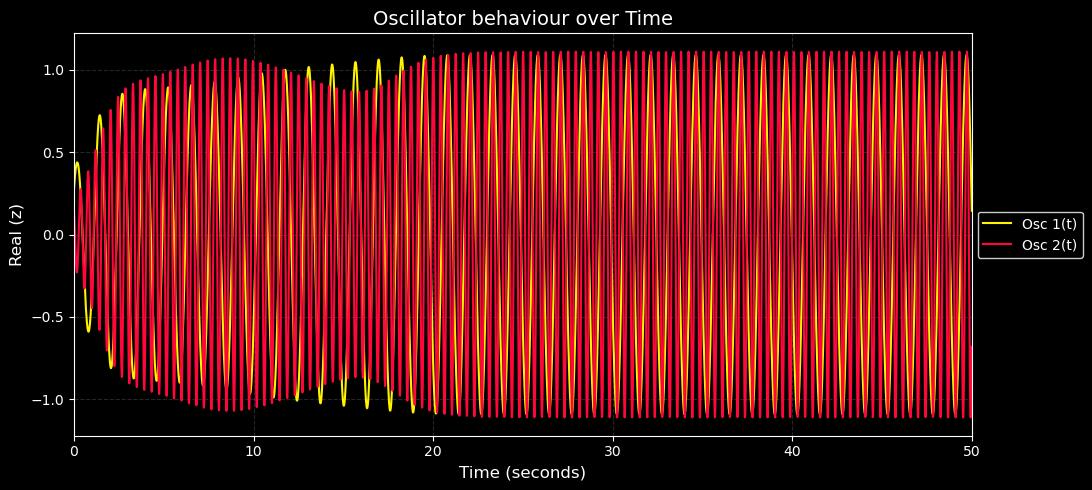

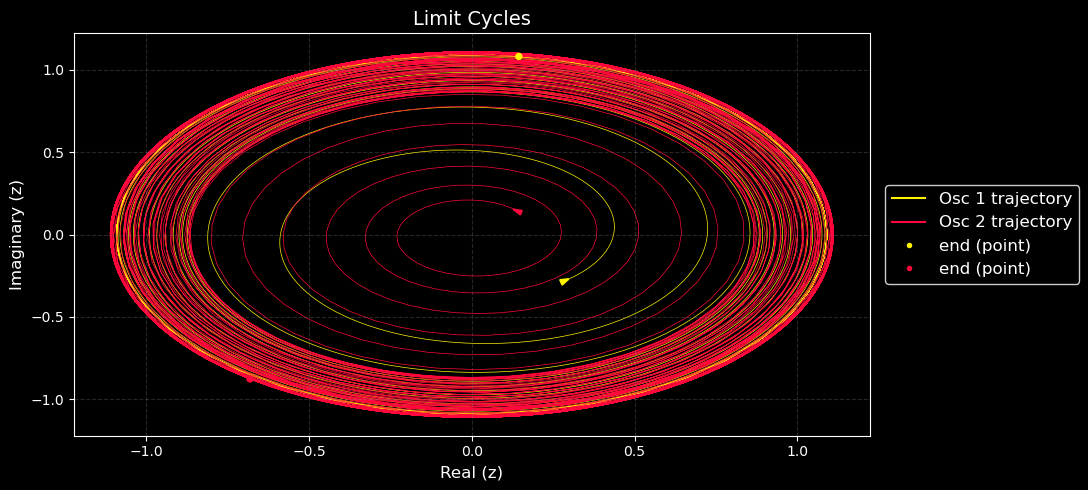

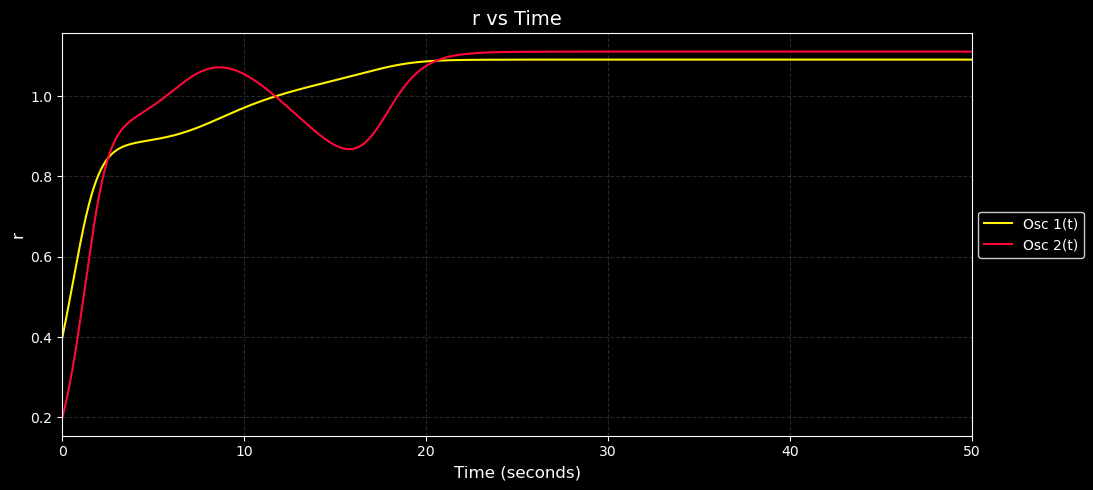

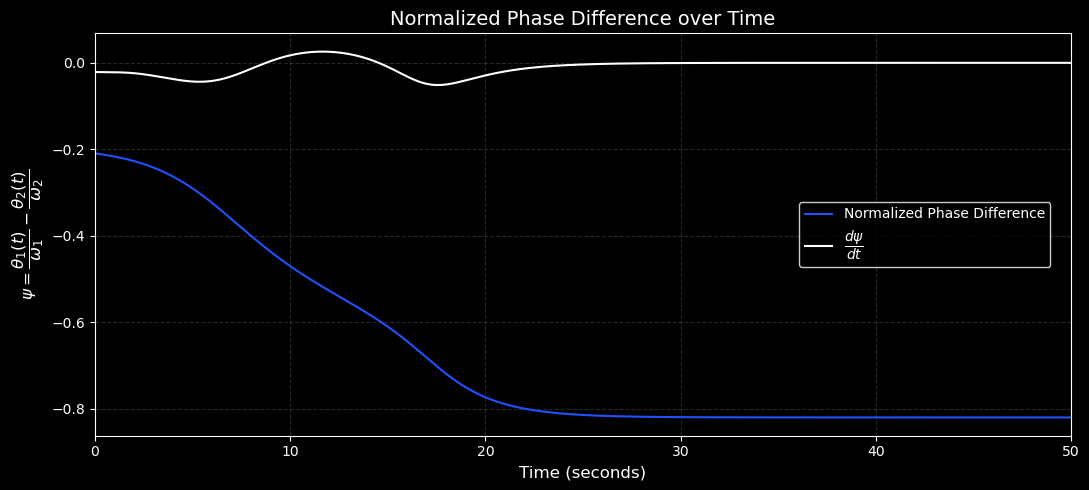

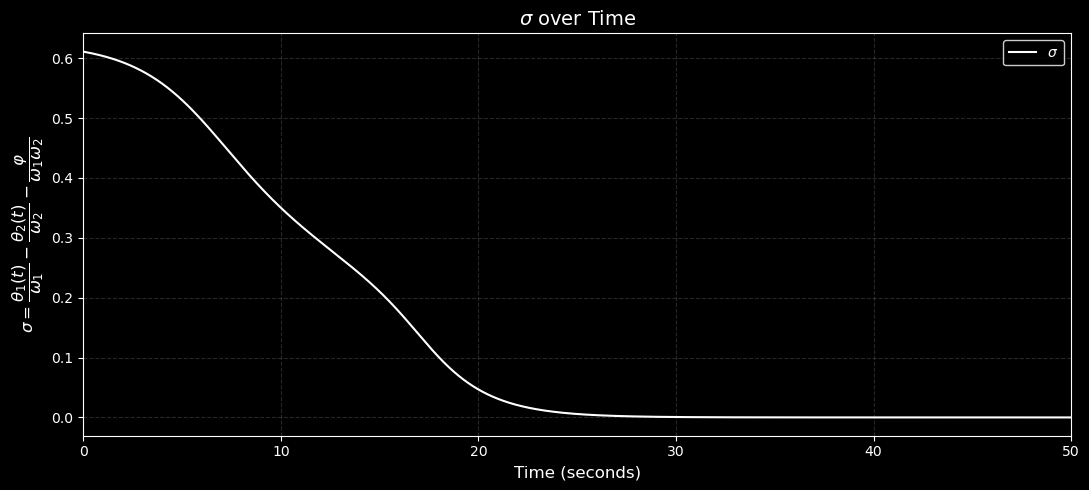

In [6]:
w1,w2 = 5,15
phi = (-47)*(math.pi/180)*w1*w2

PC = Power_Coupling(w1,w2,phi)

r1 = 0.4
r2 = 0.2

theta_1 = -45*(math.pi/180)
theta_2 = 45*(math.pi/180)

A = 0.2

PC.model(r1, r2, theta_1, theta_2, A)
PC.osc_behaviour_plot()
PC.argand_plot()
PC.RT_plot()
PC.normalized_phase_difference()
PC.sigma_plot()

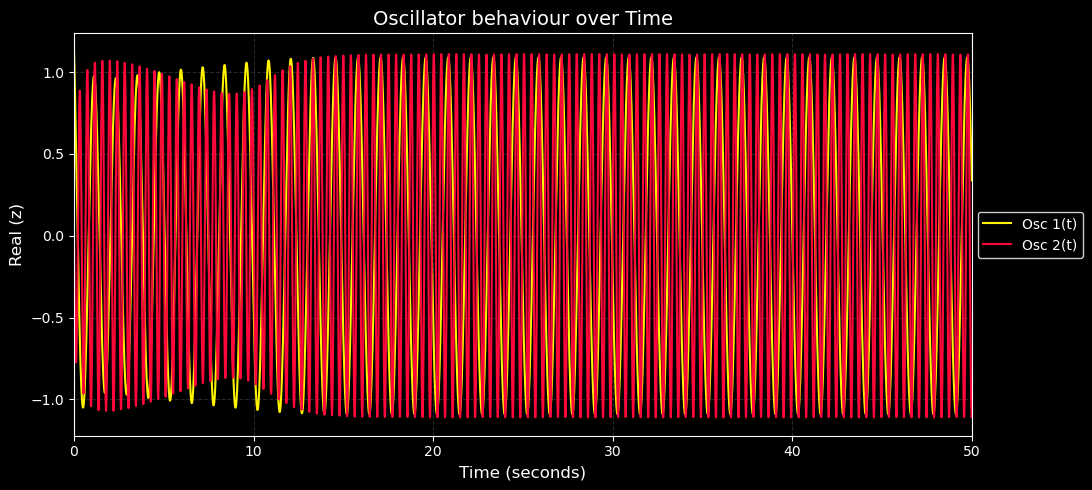

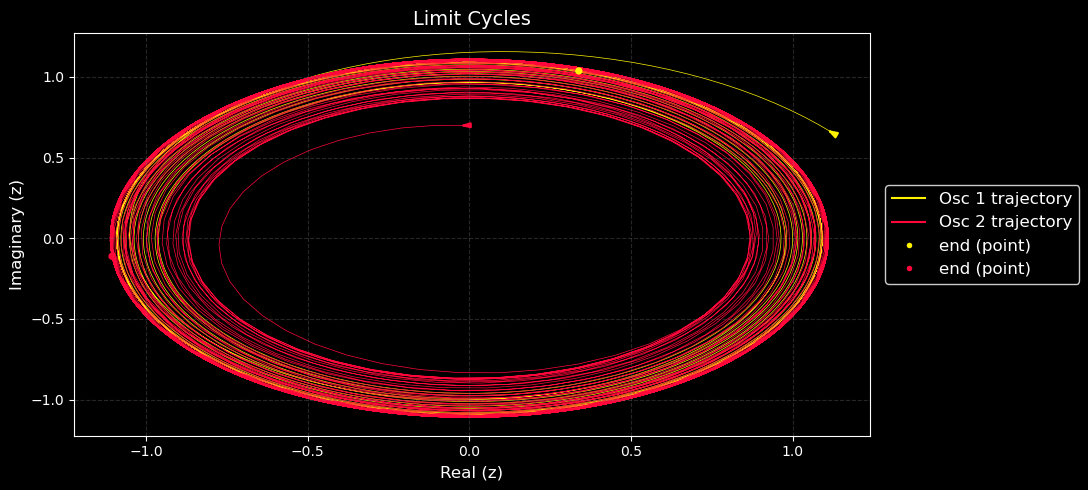

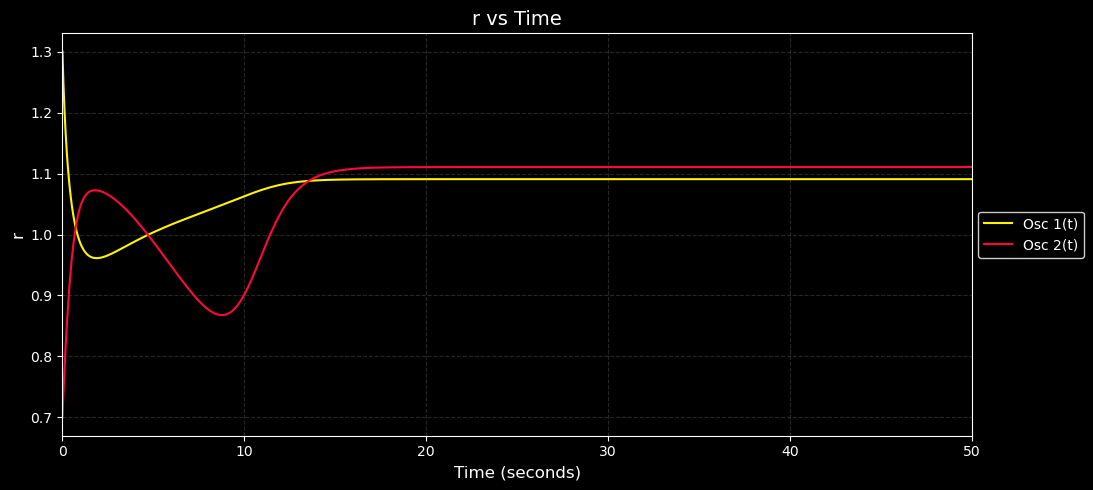

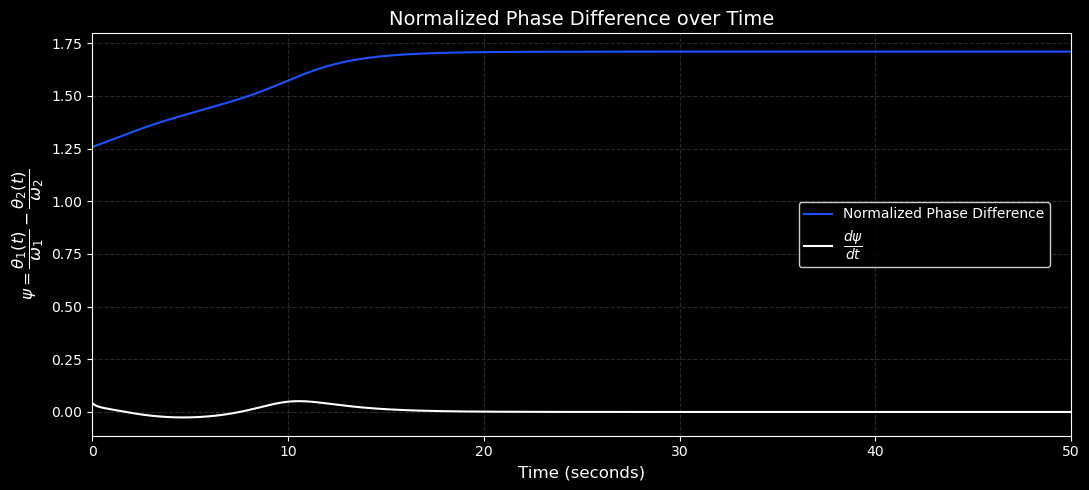

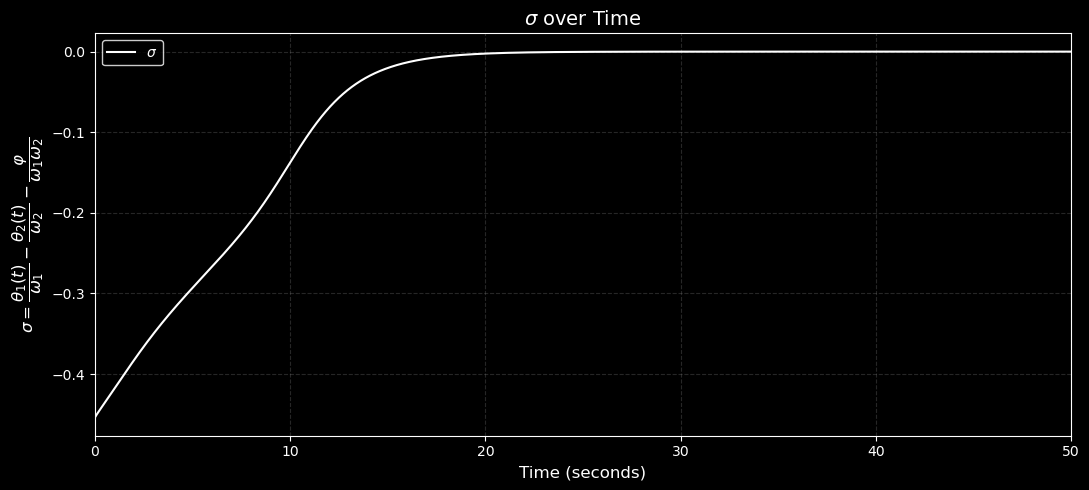

In [7]:
w1,w2 = 5,15
phi = (98)*(math.pi/180)*w1*w2

PC = Power_Coupling(w1,w2,phi)

r1 = 1.3
r2 = 0.7

theta_1 = (390)*(math.pi/180)
theta_2 = (90)*(math.pi/180)

A = 0.2

PC.model(r1, r2, theta_1, theta_2, A)
PC.osc_behaviour_plot()
PC.argand_plot()
PC.RT_plot()
PC.normalized_phase_difference()
PC.sigma_plot()